Número de pedidos satisfechos en cada día de la semana:
[15, 14, 15, 13, 16, 15, 11]


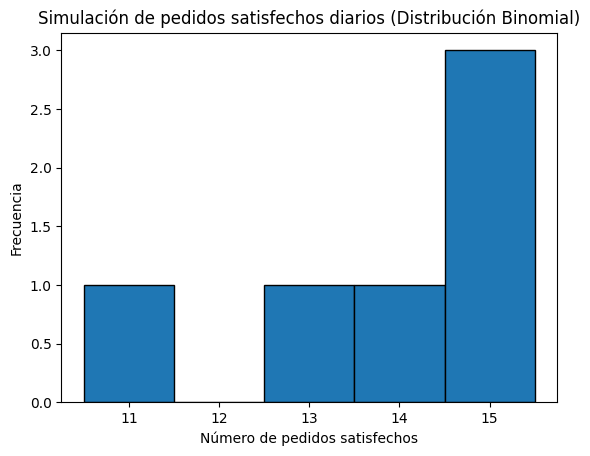

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Parámetros de la distribución binomial
n = 20   # Número de pedidos diarios
p = 0.70 # Probabilidad de que un pedido sea satisfecho

# Generar un número aleatorio uniforme U ~ Uniform(0, 1)
num_dias = 7  # Simulación para una semana (7 días)
U = np.random.uniform(0, 1, num_dias)

# Función de distribución acumulada de la distribución binomial
def binomial_pmf(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

def binomial_inverse_transform(n, p, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += binomial_pmf(n, k, p)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de pedidos satisfechos
        k += 1

# Generar la cantidad de pedidos satisfechos en cada simulación (día)
pedidos_satisfechos = [binomial_inverse_transform(n, p, u) for u in U]

# Mostrar resultados
print("Número de pedidos satisfechos en cada día de la semana:")
print(pedidos_satisfechos)

# Graficar los resultados
plt.hist(pedidos_satisfechos, bins=np.arange(min(pedidos_satisfechos), max(pedidos_satisfechos) + 1) - 0.5, edgecolor='black')
plt.title("Simulación de pedidos satisfechos diarios (Distribución Binomial)")
plt.xlabel("Número de pedidos satisfechos")
plt.ylabel("Frecuencia")
plt.show()